### **直方图匹配**

将直方图映射成指定的分布形式的代码，称为直方图匹配或直方图规定化

OpenCV4中并没有给出直方图匹配的函数，我们需要通过算法自行实现直方图匹配

示例中待匹配的原图是一张整体偏暗的图像，目标直方图分配形式来源于一张较明亮的图像，经过匹配操作后图像的亮度提高了

In [16]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [17]:
# 读取图像并判断是否读取成功
img1 = cv.imread(rootpath +'Hist_Match.png')
img2 = cv.imread(rootpath +'equalLena.png')
if img1 is None or img2 is None:
    print('Failed to read Hist_Match.png or equalLena.png')
    sys.exit

In [18]:
# 计算两幅图像的直方图
hist_image1 = cv.calcHist([img1], [0], None, [256], [0, 256])
hist_image2 = cv.calcHist([img2], [0], None, [256], [0, 256])
# 对直方图进行归一化
# 采用L1矩阵，输出结果为每个灰度值所占的比例
hist_image1 = cv.normalize(hist_image1, None, norm_type=cv.NORM_L1)
hist_image2 = cv.normalize(hist_image2, None, norm_type=cv.NORM_L1)

In [19]:
# 计算两幅图像直方图的累计概率
hist1_cdf = np.zeros((256, ))
hist2_cdf = np.zeros((256, ))
hist1_cdf[0] = 0
hist2_cdf[0] = 0
for i in range(1, 256):
    hist1_cdf[i] = hist1_cdf[i - 1] + hist_image1[i]
    hist2_cdf[i] = hist2_cdf[i - 1] + hist_image2[i]
# 构建累计概率误差矩阵
diff_cdf = np.zeros((256, 256))
for k in range(256):
    for j in range(256):
        diff_cdf[k][j] = np.fabs((hist1_cdf[k] - hist2_cdf[j]))
# 打印累计概率误差矩阵
print('累计概率误差矩阵为：\n{}'.format(diff_cdf))

累计概率误差矩阵为：
[[0.00000000e+00 2.86483765e-03 7.65228271e-03 ... 9.92107391e-01
  9.95742798e-01 9.98023987e-01]
 [6.70155452e-04 2.19468219e-03 6.98212726e-03 ... 9.91437236e-01
  9.95072642e-01 9.97353831e-01]
 [1.78264687e-03 1.08219078e-03 5.86963585e-03 ... 9.90324744e-01
  9.93960151e-01 9.96241340e-01]
 ...
 [9.99991894e-01 9.97127056e-01 9.92339611e-01 ... 7.88450241e-03
  4.24909592e-03 1.96790695e-03]
 [9.99991894e-01 9.97127056e-01 9.92339611e-01 ... 7.88450241e-03
  4.24909592e-03 1.96790695e-03]
 [9.99991894e-01 9.97127056e-01 9.92339611e-01 ... 7.88450241e-03
  4.24909592e-03 1.96790695e-03]]


(array([ 1224.,  6708.,     0., 12330.,     0.,     0.,     0., 27567.,
            0.,     0.,     0.,     0.,     0.,     0., 48042.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 69069.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 81027.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 85170.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 87858.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        86892.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 84924.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 83430.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 76671.,     0.,     0.,     0., 

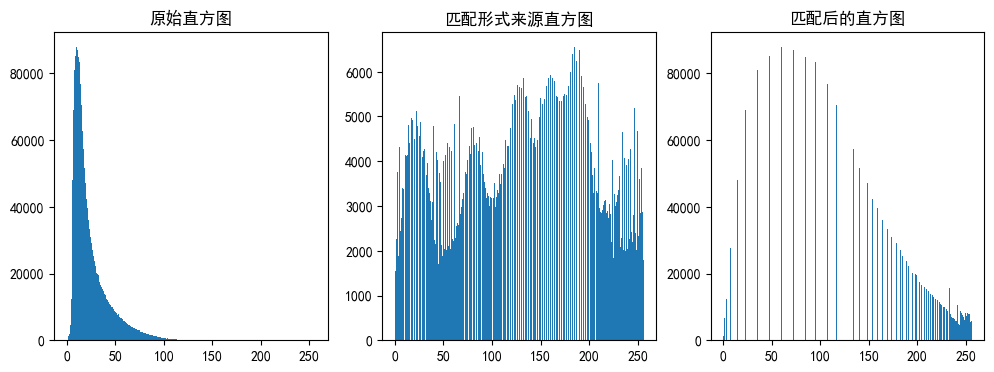

In [20]:
# 生成映射表
lut = np.zeros((256, ), dtype='uint8')
for m in range(256):
    # 查找原来灰度值i映射的灰度和i的累计概率差值最小的归一化灰度
    min_val = diff_cdf[m][0]
    index = 0
    for n in range(256):
        if min_val > diff_cdf[m][n]:
            min_val = diff_cdf[m][n]
            index = n
    lut[m] = index
# 使用LUT进行映射
result = cv.LUT(img1, lut)

# 展示结果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始直方图')
plt.hist(img1.ravel(), 256, [0, 256])
plt.subplot(1, 3, 2)
plt.title('匹配形式来源直方图')
plt.hist(img2.ravel(), 256, [0, 256])
plt.subplot(1, 3, 3)
plt.title('匹配后的直方图')
plt.hist(result.ravel(), 256, [0, 256])

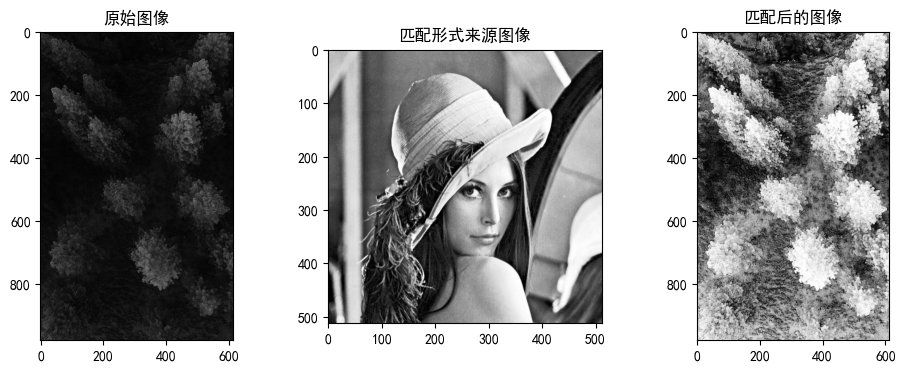

In [21]:
# 展示匹配后的图像
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('匹配形式来源图像')
plt.imshow(img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('匹配后的图像')
plt.imshow(result, cmap='gray')